<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/TensorFlow/Uploading_your_own_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Navigating through github to access the data

In [1]:
!git clone https://github.com/ardamavi/Dog-Cat-Classifier.git

Cloning into 'Dog-Cat-Classifier'...
remote: Enumerating objects: 1654, done.
remote: Total 1654 (delta 0), reused 0 (delta 0), pack-reused 1654
Receiving objects: 100% (1654/1654), 34.83 MiB | 26.05 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [2]:
!ls

Dog-Cat-Classifier  sample_data


In [4]:
%ls


Dog-Cat-Classifier/  sample_data/


In [6]:
%cd Dog-Cat-Classifier
%ls

/content/Dog-Cat-Classifier
Data/           LICENSE     README.md         test_dog.jpg
get_dataset.py  Model.png   requirements.txt  train.py
get_model.py    predict.py  test_cat.jpg


In [7]:
%cd Data
%ls 

/content/Dog-Cat-Classifier/Data
Checkpoints/  Layer_Outputs/  Model/  npy_train_data/  Train_Data/


In [8]:
%cd Train_Data
%ls

/content/Dog-Cat-Classifier/Data/Train_Data
cat/  dog/


In [0]:
%cd dog 
%ls

In [10]:
%pwd   #this will print the Working Direcctory

'/content/Dog-Cat-Classifier/Data/Train_Data/dog'

#Reading all of the images in the directory
in this section I will make two lists that cointrain the images of dogs and cats seperatly

In [0]:
import cv2
import matplotlib.pyplot as plt
import os
images = []
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images
  
dog_images = load_images_from_folder('/content/Dog-Cat-Classifier/Data/Train_Data/dog')
cat_images = load_images_from_folder('/content/Dog-Cat-Classifier/Data/Train_Data/cat')

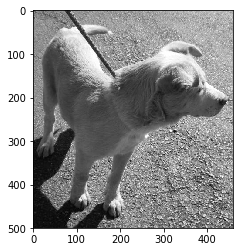

In [24]:
plt.imshow(dog_images[12], cmap='gray')

#Resizing all of the images
the different images in this data set has different sizes. some of them are landscape some are vertical and so on. But to train a neural network we need to neurish the network with data all of them have same features size.

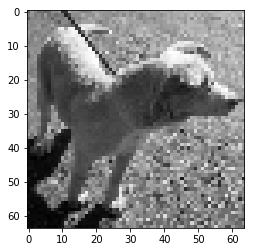

In [119]:
IMG_SIZE = 64
dog = []  #list containing the 50*50 images of dogs
cat = []  #list containing the 50*50 images of cats
for dog_im in dog_images: 
  dog.append(cv2.resize(dog_im, (IMG_SIZE, IMG_SIZE)))
for cat_im in cat_images:
  cat.append(cv2.resize(cat_im, (IMG_SIZE, IMG_SIZE)))
plt.imshow(dog[12], cmap='gray')

#Creating data set


0


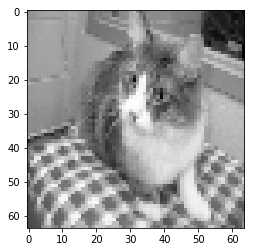

In [120]:
import numpy as np
data = cat + dog
labels = [0]*len(cat) + [1]*len(dog)    # 0 for cat and 1 for dogs
np.random.seed(15)
np.random.shuffle(data)
np.random.shuffle(labels)
data = np.array(data)
labels = np.array(labels)
plt.imshow(data[58], cmap ='gray')
print(labels[58])

#The summary of the data set
now our data set is ready.
data ---> contains about 1300 pictures of cats and dogs in a shuffled state
labels ----> contains labels associated to each picture

#Neural network for our dara


In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [0]:
data = tf.keras.utils.normalize(data)  #normalizing data
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=43)

#Builing model

In [134]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
            metrics=['accuracy'] )

model.fit(x_train.reshape(-1,64*64), y_train, epochs=3)

Epoch 1/3
1049/1049 [==============================] - 1s 672us/sample - loss: 0.6944 - acc: 0.5272
Epoch 2/3
1049/1049 [==============================] - 0s 307us/sample - loss: 0.6936 - acc: 0.4938
Epoch 3/3
1049/1049 [==============================] - 0s 316us/sample - loss: 0.6939 - acc: 0.4776


In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         multiple                  0         
_________________________________________________________________
dense_104 (Dense)            multiple                  524416    
_________________________________________________________________
dense_105 (Dense)            multiple                  8256      
_________________________________________________________________
dense_106 (Dense)            multiple                  2080      
_________________________________________________________________
dense_107 (Dense)            multiple                  528       
_________________________________________________________________
dense_108 (Dense)            multiple                  136       
_________________________________________________________________
dense_109 (Dense)            multiple                  36        
__________

In [136]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

350/350 [==============================] - 0s 741us/sample - loss: 0.6931 - acc: 0.5029
0.6931001758575439 0.50285715
